# Classifying Heart Disease

In this project, we'll try to classify the presence of heart disease in an individual using a dataset collected by the Cleveland Clinic Foundation.

We'll be using the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UCI Machine Learning Repository. As mentioned, this dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

> Note: The dataset has already been partially cleaned. The original dataset has multiple classes.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Exploratory Data Analysis
With the dataset properly loaded, let's take some time to better understand the dataset at hand.

In [3]:
#find list column names, dtypes, and null value counts 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [4]:
#df objects for features and target variable

features = heart.drop('present', axis=1)
target = heart['present']

In [5]:
#printing datatypes information of feature variables
print("\nFeature columns:")
print(features.dtypes)

print("\nData types summary:")
print(features.dtypes.value_counts())


Feature columns:
Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
dtype: object

Data types summary:
int64      11
object      2
float64     1
dtype: int64


In [6]:
#the proportion of labeled observations 
target.value_counts(normalize=True)

0    0.541254
1    0.458746
Name: present, dtype: float64

In [7]:
#displaying descriptive statistics of dataset
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Some notes on the dataset:
- The average age is around 54.4 years
- There are more men than women in the study
- 

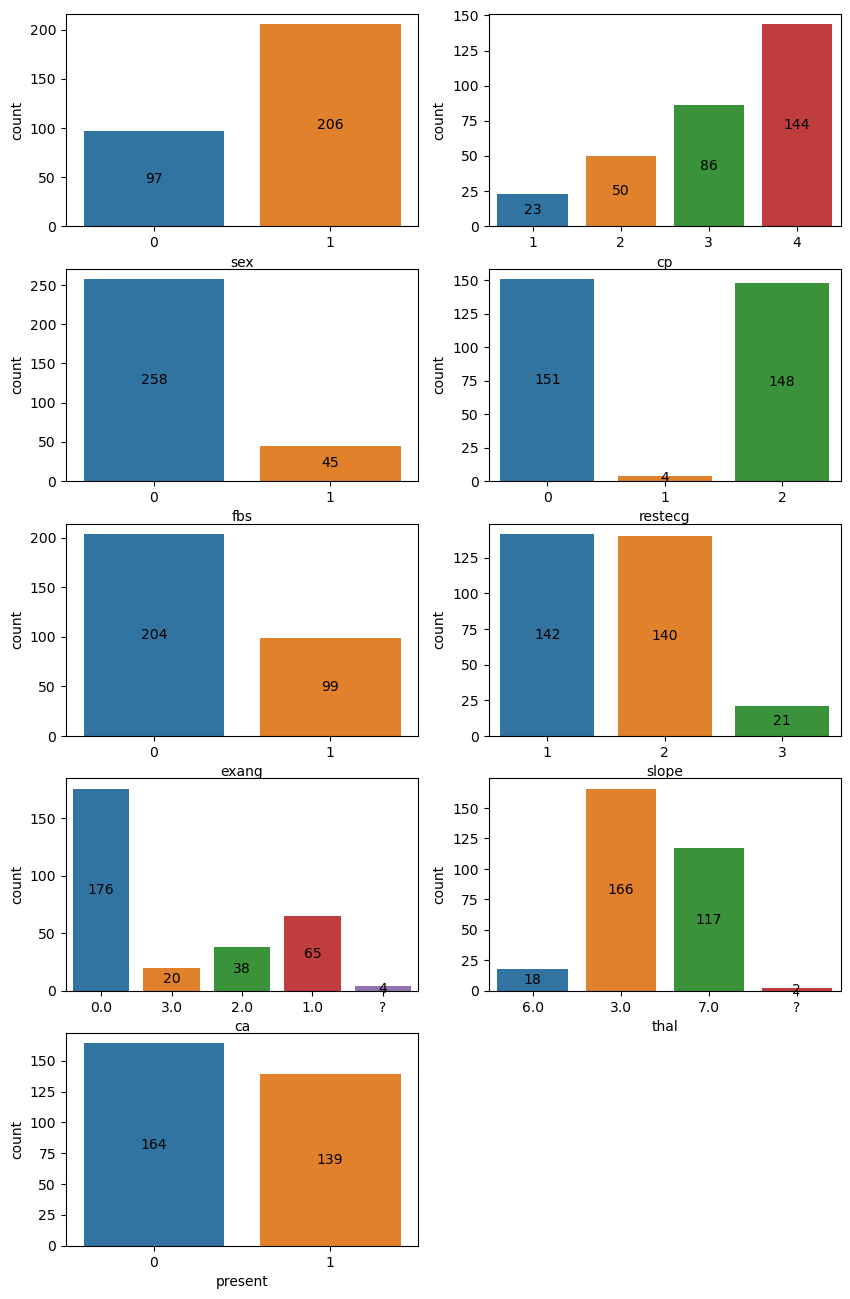

In [8]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'present']

fig = plt.figure(figsize=(10,16))

for idx, col in enumerate(cat_cols):
    ax = plt.subplot(5, 2, idx+1)
    sns.countplot(x=heart[col], ax=ax)
    #add data label to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
        #uncomment below if wishing to include percentages in bar labels
        #ax.bar_label(container, label_type='edge', labels=[f'{(count/total)*100:.0f}%' for count in container.datavalues])

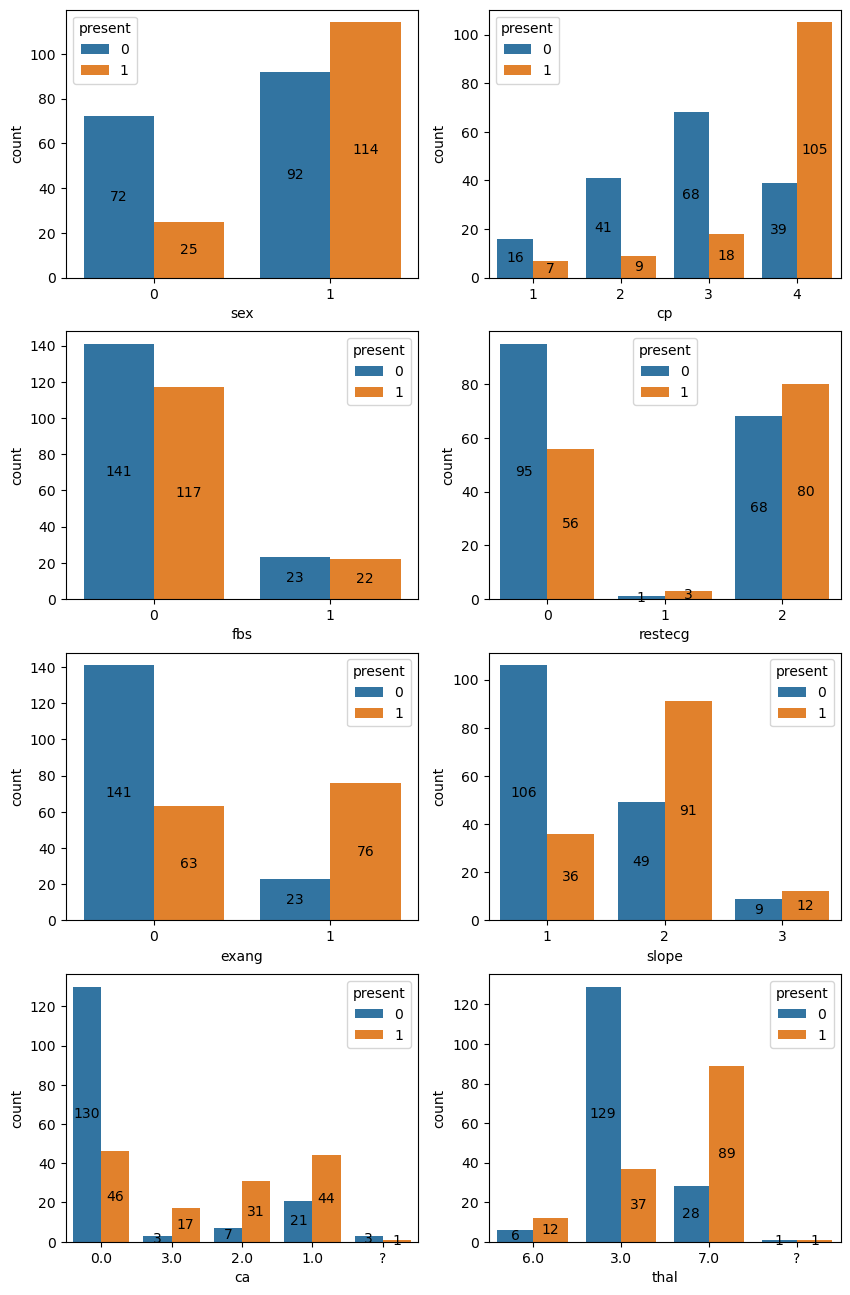

In [9]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(10,16))

for idx, col in enumerate(cat_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=heart[col], hue=heart['present'], ax=ax) #group by heart disease
    #add data label to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
        #uncomment below if wishing to include percentages in bar labels
        #ax.bar_label(container, label_type='edge', labels=[f'{(count/total)*100:.0f}%' for count in container.datavalues])

On the above charts

- On `sex`
    - Men take up a disportionally large proportion of all observations
    - While heart disease is only observed in about a quarter of all the women in the study, heart disease is observed in the *majority* of men
- `restecg` has an almost even split between 0 (normal) and 2 (showing probable/definite left ventricular hypertrophy)
    - Interestingly, there are about a handful of cases where `1` (having ST-T wave abnormality) is recorded
- `exang` (exercised induced angina)
   -  Theres a pretty clear indication that those who experience pain in their chest when exercising are more than three times more likely to have heart disease

In [10]:
heart[heart['restecg'] == 1]

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
231,232,55,0,4,180,327,0,1,117,1,3.4,2,0.0,3.0,1
257,258,76,0,3,140,197,0,1,116,0,1.1,2,0.0,3.0,0
282,283,55,0,4,128,205,0,1,130,1,2.0,2,1.0,7.0,1
285,286,58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,1


In [11]:
# Checking potential predictors
heart.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean"
    }
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
present,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338


## Initial Notes on Dataset

- There are 303 rows
- 15 columns
    - first column (`Unnamed: 0`) doesn't seem informative
    - Data types:
        - float: 1
        - int: 12
        - object: 2

## Cleaning the Dataset Further

Even though it was claimed that the dataset was cleaned, we simply can't take anyone's word for it and not verify for ourselves.

In [12]:
heart[['Unnamed: 0', 'ca', 'thal']]

,Unnamed: 0,ca,thal
0,1,0.0,6.0
1,2,3.0,3.0
2,3,2.0,7.0
3,4,0.0,3.0
4,5,0.0,3.0
...,...,...,...
298,299,0.0,7.0
299,300,2.0,7.0
300,301,1.0,7.0
301,302,1.0,3.0


In [13]:
s1 = heart['ca'].value_counts()
s2 = heart['ca'].value_counts(normalize=True).round(3)*100
pd.concat([s1, s2], axis=1)

,ca,ca
0.0,176,58.1
1.0,65,21.5
2.0,38,12.5
3.0,20,6.6
?,4,1.3


Column `ca` has four `?` entries, accounting for about 1.3% of the entire dataset.

In [14]:
s1 = heart['thal'].value_counts()
s2 = heart['thal'].value_counts(normalize=True).round(3)*100
pd.concat([s1, s2], axis=1)

,thal,thal
3.0,166,54.8
7.0,117,38.6
6.0,18,5.9
?,2,0.7


Column `thal` has two `?` entries, accounting for less than 1% of all observations.

### Errant Entries Summary

It's a good thing that we didn't take for granted the data made available to us. As you can see, there are a few things that need to be addressed before moving forward with our analysis.

1. Probably the result of some remnant artifact in initial cleaning and uploading, the first column (`Unnamed: 0`) doesn't serve a purpose. It should be removed entirely.
2. Other issues involve columns `ca` and `thal`. 
    - `ca`
        - Four character `?` entries 
            - Seeing as these four only account for 1.3% of all observations, it should be safe to simply remove them
        - As per the official documentation:
            - Labeled as an 'integer' in source's documentation
                - The data type `object` (string) is instead observed when downloaded
         - >"number of major vessels (0-3) colored by flourosopy"
        - the above charts and tables indicate that there are multiple errant entries (`?`)
    - `thal`
        - Two character `?` entries
             - Seeing as these two entries don't even account for 1% of all observations, it should be safe to remove them entirely
        - Considered 'categorical' in dataset
            > - 3 = normal
            > - 6 = fixed defect
            > - 7 = reversable defect

Let's clean up these columns.

#### Dropping Column `Unnamed: 0`

In [15]:
#copying the dataframe
clean_df = heart.copy()

#dropping unnecessary column
clean_df.drop(columns=['Unnamed: 0'], inplace=True)
clean_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Cleaning `ca` and `thal`

In [16]:
ca_qs = clean_df.loc[clean_df['ca'] == '?']
ca_qs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [17]:
thal_qs = clean_df.loc[clean_df['thal'] == '?']
thal_qs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,1


In [18]:
#omiting observations where `ca` == `?`
clean_df.drop(ca_qs.index, inplace=True)

#omiting observations where `thal` == `?`
clean_df.drop(thal_qs.index, inplace=True)

#resetting index
clean_df.reset_index(drop=True, inplace=True)

In [19]:
#quick check of work
print('Values counts in \'ca\':')
print(clean_df['ca'].value_counts(),'\n')

print('Values in \'thal\':')
print(clean_df['thal'].value_counts(),'\n')

print('Rows in dataset: ',clean_df.shape[0])

Values counts in 'ca':
0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64 

Values in 'thal':
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64 

Rows in dataset:  297


We'll change the data type of these two columns to integers in order to move forward with the preliminary analysis. 

Please be aware that even though we are transforming these variables into integers, they are ultimately categorical in nature. Transforming them from objects to integers just makes the data a little more maleable.

More on that further along in our breakdown.

In [20]:
#changing data types of 'ca' and 'thal' into integers
clean_df[['ca', 'thal']] = clean_df[['ca', 'thal']].astype('float').astype('int')

#checking the data types
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  present   297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## Feature Selection

In [21]:
# Checking potential predictors
clean_df.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean",
        "ca": "mean",
        "thal": "mean"
    }
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors:

- `age`
- `thalach` (maximum heart rate achieved)
- `restecg` (resting ECG)
- `ca`
    - number of vessels colored by fluoroscopy
    - `ca` count postively correlates with heart disease
    

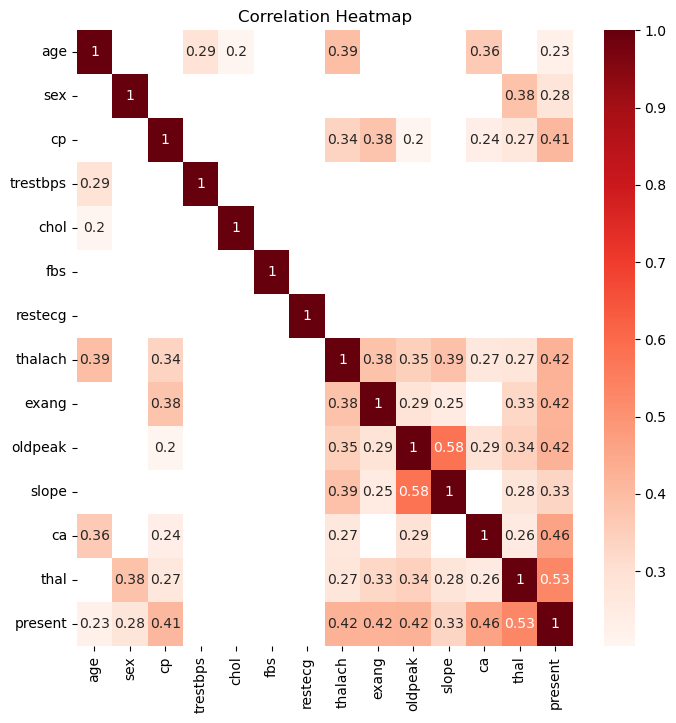

thal       0.526640
ca         0.463189
oldpeak    0.424052
thalach    0.423817
exang      0.421355
cp         0.408945
Name: present, dtype: float64

In [22]:
# heatmap of correlation NO DUMMIES
corr = clean_df.corr().abs()
plt.figure(figsize=(8, 8))
sns.heatmap(corr[corr > 0.2], annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
# plt.tight_layout()
plt.show()
corr['present'].sort_values(ascending=False).iloc[1:].head(6)

In [23]:
#breaking down the category columns futher with dummie variables
cat_columns = ['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_dummies = pd.get_dummies(clean_df, columns=cat_columns)
df_dummies.head()

,age,trestbps,chol,thalach,oldpeak,present,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [24]:
#breaking down the category columns futher with dummie variables
cat_columns = ['cp', 'restecg', 'slope', 'ca', 'thal']
df_dummies = pd.get_dummies(clean_df, columns=cat_columns)
df_dummies.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,present,cp_1,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,1,1,0,0,0,0,1,0
1,67,1,160,286,0,108,1,1.5,1,0,...,0,1,0,0,0,0,1,1,0,0
2,67,1,120,229,0,129,1,2.6,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,1,0,0,0,1,0,0


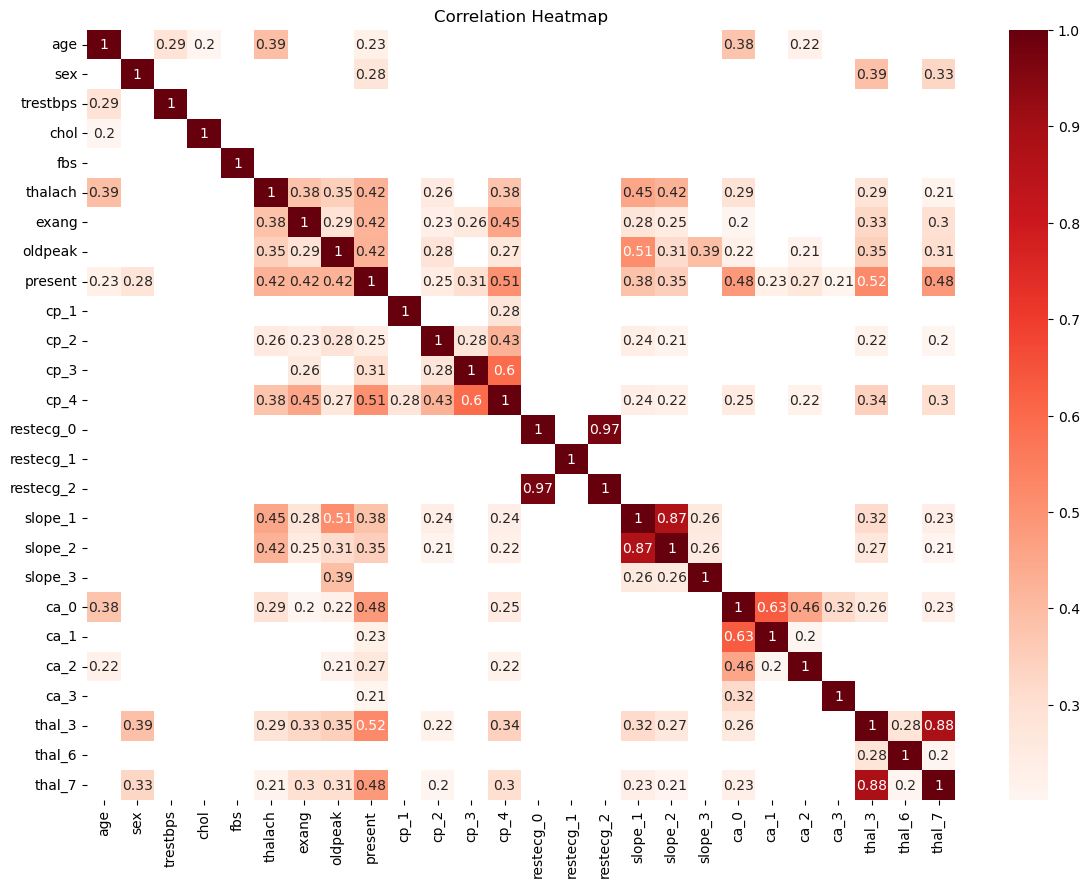

thal_3     0.524972
cp_4       0.507035
thal_7     0.484657
ca_0       0.483530
oldpeak    0.424052
Name: present, dtype: float64

In [25]:
# a more granular heatmap of correlations YES DUMMIES
corr = df_dummies.corr().abs()
plt.figure(figsize=(14, 10))
sns.heatmap(corr[corr > 0.2], annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
# plt.tight_layout()
plt.show()
corr['present'].sort_values(ascending=False).iloc[1:].head(5)

The above seem to indicate that the following variables are worth exploring further:
- `thal`
- `ca`
- `oldpeak`
- `thalach`
- `exang`
- `cp`

## Dividing the Data
Now that we have some predictors, we need to set aside some data to act as a final assessment of our model.

1. A training set that will be used to estimate the regression coefficients
2. A test set that will be used to assess the predictive ability of the model

The model will be fit to the training set, and predictive ability will be assessed on the test set. We'll need to make sure that both sets contain both cases and non-cases.

Let's take the time to divide up the data properly.

In [26]:
X = clean_df[['thal', 'ca', 'oldpeak', 'thalach', 'exang', 'cp']]
y = clean_df['present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=417)

In [27]:
# Checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

Y_train:  132
Y_train:  105
Y_test:  28
Y_test:  32


Looks like we have both case and non-case observations present in our training and test datasets.

## Building the Model

With our dataset divided up, let's build the classification model and do some initial assessments. Some guiding questions worth considering:

- What is the overall training accuracy? Sensitivity and specificity?
- Does the model perform better on cases or non-cases? Or does it perform equally well?

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.8396624472573839
Training Sensitivity:  0.7619047619047619
Training Specificity:  0.9015151515151515


Overall the training accuracy was about 84%, the sensitivity was 76%, and the specificity was 90%. Based on these metrics, the model seems to perform better for predicting non-cases.

## Interpreting the Model Coefficients

In [43]:
coefs = ['thal', 'ca', 'oldpeak', 'thalach', 'exang', 'cp']
data = []

for coef, val in zip(coefs, model.coef_[0]):
    # Checking in terms of log-odds
    log_odds = round(val, 2)
    # Checking in terms of odds
    odds = round(np.exp(val), 2)
    data.append([coef, log_odds, odds])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Coefficient', 'Log-Odds', 'Odds'])
df

,Coefficient,Log-Odds,Odds
0,thal,0.43,1.54
1,ca,0.87,2.38
2,oldpeak,0.44,1.55
3,thalach,-0.01,0.99
4,exang,0.92,2.51
5,cp,0.61,1.84


The odds ratios are greater than one for all but one of our predictors. Holding older predictors constant, an increase in any of these variables is associated with highers odds of heart disease. 



## Final Model Evaluation

In [44]:
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.8333333333333334
Test Sensitivity:  0.875
Test Specificity:  0.7857142857142857


# Conclusions

The model seems to make sense and matches up with what one might expect.

The model seems to predict positive cases better non-cases. The model might prove especially helpful for medical professionals. 

The accuracy of the model seems reliable enough and could aid medical professionals in determining if further screening or testing is required. Doctors and nurses are those who ultimately need to make those determinations, but arming them with reliable information could help them quickly identify those patients that might need additional screening. The model seems reliable enough to help in that regard.